# Using the Chosen Model, SVM Which performs better than
# Naive Bayes, KNN and Decision Tree

In [23]:
# import all the necessary libraries and packages for the analysis
import nltk
nltk.download('wordnet')

import pandas as pd
import seaborn as sns
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import classification_report



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\25862430\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Load the training dataset with corrected file path
train_data = pd.read_csv(r'Downloads\reviews_Apps_for_Android_5.training.txt', sep='\t')
train_data.head()

,2,B004A9SDD8,"Loves the song, so he really couldn't wait to play this. A little less interesting for him so he doesn't play long, but he is almost 3 and likes to play the older games, but really cute for a younger child."
0,3,B004A9SDD8,"Oh, how my little grandson loves this app. He'..."
1,3,B004A9SDD8,I found this at a perfect time since my daught...
2,3,B004A9SDD8,My 1 year old goes back to this game over and ...
3,3,B004A9SDD8,There are three different versions of the song...
4,3,B004A9SDD8,THis is just so cute and a great app for littl...


In [8]:

# Assign column names to the data frame because there was no column label to the train dataset
train_data.columns = ['Review_ID', 'Label', 'Review_Text']

# Rename the DataFrame to 'training_data'
training_data = train_data.copy()

# Display the first few rows of the DataFrame with the column names 
training_data .head()

,Review_ID,Label,Review_Text
0,3,B004A9SDD8,"Oh, how my little grandson loves this app. He'..."
1,3,B004A9SDD8,I found this at a perfect time since my daught...
2,3,B004A9SDD8,My 1 year old goes back to this game over and ...
3,3,B004A9SDD8,There are three different versions of the song...
4,3,B004A9SDD8,THis is just so cute and a great app for littl...


In [9]:
# Check for missing values (NaN) in 'Class Label', 'ID', and 'Reviews_text' columns
missing_values = training_data[['Review_ID', 'Label', 'Review_Text']].isnull().sum()

# Check for zero values in 'Class Label', 'ID', and 'Reviews_text' columns
zero_values = (training_data[['Review_ID', 'Label', 'Review_Text']] == 0).sum()

print("Missing Values in 'Review_ID', 'Label', 'Review_Text':")
print(missing_values)

print("\nZero Values in 'Review_ID', 'Label', 'Review_Text':")
print(zero_values)


Missing Values in 'Review_ID', 'Label', 'Review_Text':
Review_ID      0
Label          0
Review_Text    0
dtype: int64

Zero Values in 'Review_ID', 'Label', 'Review_Text':
Review_ID      0
Label          0
Review_Text    0
dtype: int64


SVM Sentiment Analysis Results for Test Data:
Accuracy: 0.8044804480448045
Precision: 0.7735046934665523
F1-Score: 0.7751578022341482


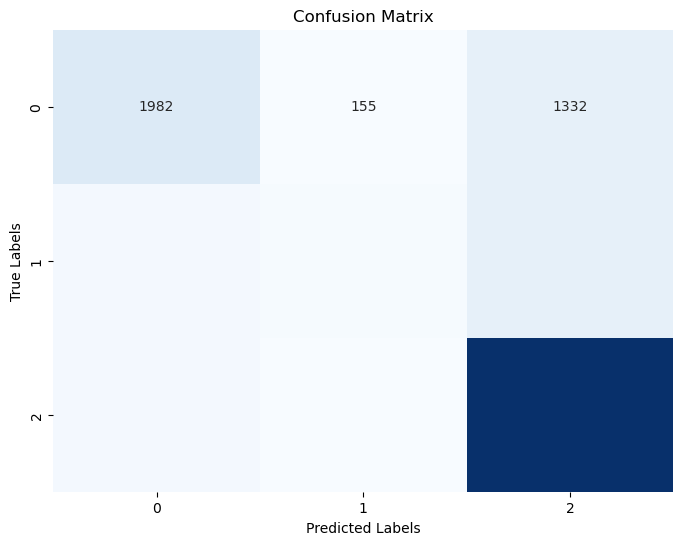

In [17]:

# Define preprocess_text function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # Remove non-alphabetic words
    words = [word for word in stripped if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a string
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

# Load the training dataset
train_data = pd.read_csv(r'Downloads\reviews_Apps_for_Android_5.training.txt', sep='\t')

# Load the separate test dataset
test_data = pd.read_csv(r'Downloads\reviews_Apps_for_Android_5.test.txt', sep='\t')

# Assign column names to the test data frame
test_data.columns = ['Class Label', 'ID', 'Reviews_text']

# Assign column names to the training data frame
train_data.columns = ['Class Label', 'ID', 'Reviews_text']

# Step 1: Preprocessing
X_train = train_data['Reviews_text']
y_train = train_data['Class Label']

# Tokenization and building the vocabulary
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)

# Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Step 2: Training the SVM model using all data
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Step 3: Preprocessing test data
X_test = test_data['Reviews_text']
y_true = test_data['Class Label']

# Tokenize and transform the test data
X_test_counts = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Step 4: Predicting with the trained model
y_pred = svm_model.predict(X_test_tfidf)

# Step 5: Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Print out performance metrics
print("SVM Sentiment Analysis Results for Test Data:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-Score:", f1_score)


In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Training the k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_tfidf, y_train)

# Step 3: Preprocessing test data
X_test = test_data['Reviews_text']
y_true = test_data['Class Label']

# Tokenize and transform the test data
X_test_counts = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Step 4: Predicting with the trained model
y_pred = knn_classifier.predict(X_test_tfidf)

# Step 5: Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# Print out performance metrics
print("KNN Sentiment Analysis Results for Test Data:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-Score:", f1_score)

KNN Sentiment Analysis Results for Test Data:
Accuracy: 0.7496749674967497
Precision: 0.7021180823136368
F1-Score: 0.7163096645847494


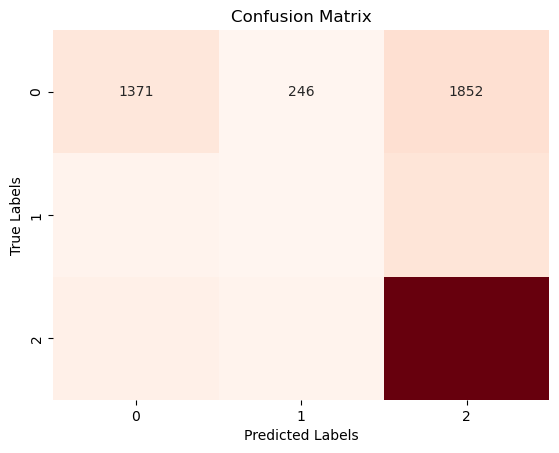

In [48]:
# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [41]:
# App ID to Company Name mapping
app_id_to_company = {
    'B004NWLM8K': 'AAD_1', 'B004Q1NH4U': 'AAD_1', 'B004LPBTAA': 'AAD_1',
    'B004S6NAOU': 'AAD_2', 'B004R6HTWU': 'AAD_2', 'B004N8KDNY': 'AAD_2',
    'B004KA0RBS': 'AAD_3', 'B004NPELDA': 'AAD_3', 'B004L26XXQ': 'AAD_3'
}

# Create a DataFrame for the test data
test_df = test_data.copy()

# Apply the mapping to the 'ID' column to create a new 'Company' column
test_df['Company'] = test_df['ID'].map(app_id_to_company)

# Preprocess the test data reviews
test_df['Processed_Review'] = test_df['Reviews_text'].apply(preprocess_text)

# Vectorize the test data using the previously fitted vectorizer
X_test_vectorized = count_vectorizer.transform(test_df['Processed_Review'])

# Predict sentiments for the test data
y_pred_test = svm_model.predict(X_test_vectorized)

# Add the predicted sentiments to the DataFrame
test_df['Predicted_Sentiment'] = y_pred_test

# Calculate sentiment scores for each company
company_scores = test_df.groupby('Company')['Predicted_Sentiment'].mean()

# Find the company with the highest average sentiment score
highest_score_company = company_scores.idxmax()
highest_score = company_scores.max()

# Display the company with the highest sentiment score
print("\nThe most successful AAD company based on the analysis is:")
print("Company:", highest_score_company)
print("Sentiment Score:", highest_score)



The most successful AAD company based on the analysis is:
Company: AAD_1
Sentiment Score: 2.9813084112149535


In [25]:
# Print all company sentiment scores
print("\nAll Company Sentiment Scores:")
print(company_scores)



All Company Sentiment Scores:
Company
AAD_1    2.981308
AAD_2    2.354730
AAD_3    2.119048
Name: Predicted_Sentiment, dtype: float64


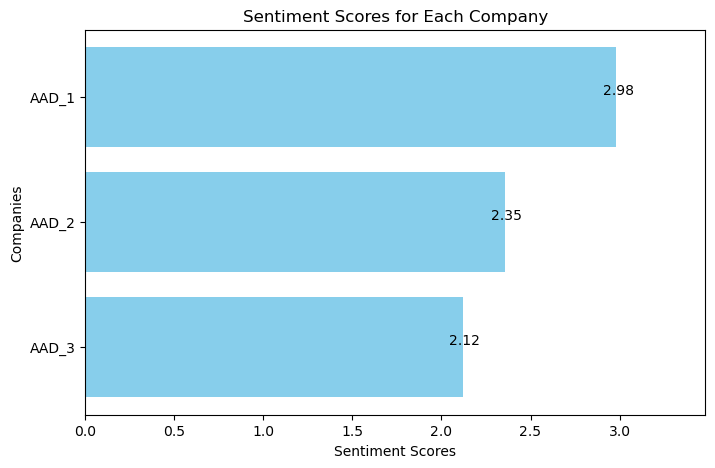

In [26]:

#Lets see the sentiment output in a bar chart
# Data for the companies and their sentiment scores
companies = ['AAD_1', 'AAD_2', 'AAD_3']
sentiment_scores = [2.981308, 2.354730, 2.119048]

# Horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the bars
bars = plt.barh(companies, sentiment_scores, color='skyblue')

# Adding labels and values on the bars
for bar, score in zip(bars, sentiment_scores):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, '{:.2f}'.format(score), 
             ha='center', va='bottom')

plt.xlabel('Sentiment Scores')
plt.ylabel('Companies')
plt.title('Sentiment Scores for Each Company')
plt.xlim(0, max(sentiment_scores) + 0.5)  # Setting x-axis limit

plt.gca().invert_yaxis()  # Invert y-axis to have highest score at the top

plt.show()


In [75]:

# Print numbers of positive, negative, and neutral reviews for each company for better understanding
print("\nNumbers of Positive, Negative, and Neutral Reviews for Each Company:")
for company, group in test_df.groupby('Company'):
    counts = group['Predicted_Sentiment'].value_counts()
    print(f"\nCompany: {company}")
    print("Positive Reviews:", counts.get(3))  
    print("Negative Reviews:", counts.get(1))  
    print("Neutral Reviews:", counts.get(2)) 


Numbers of Positive, Negative, and Neutral Reviews for Each Company:

Company: AAD_1
Positive Reviews: 106
Negative Reviews: 1
Neutral Reviews: None

Company: AAD_2
Positive Reviews: 186
Negative Reviews: 81
Neutral Reviews: 29

Company: AAD_3
Positive Reviews: 86
Negative Reviews: 66
Neutral Reviews: 16


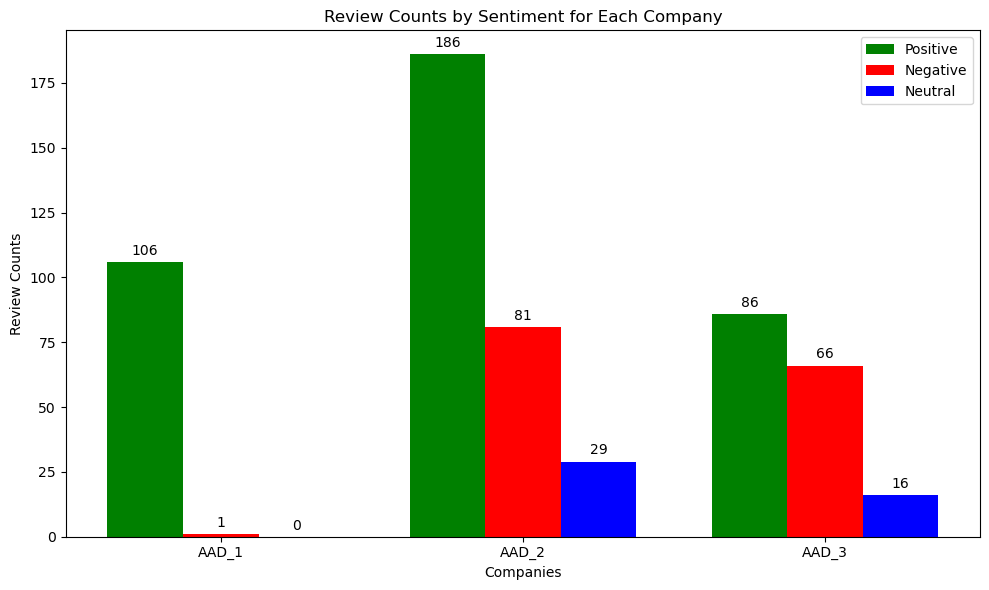

In [28]:

# Let visualize the above result in a column bar chart
# Data for the companies and their review counts
companies = ['AAD_1', 'AAD_2', 'AAD_3']
positive_reviews = [106, 186, 86]
negative_reviews = [1, 81, 66]
neutral_reviews = [0, 29, 16]

# Total number of reviews for each company
total_reviews = [pos + neg + neu for pos, neg, neu in zip(positive_reviews, negative_reviews, neutral_reviews)]

# Bar chart with grouped bars
bar_width = 0.25
index = np.arange(len(companies))

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, positive_reviews, bar_width, label='Positive', color='green')
bar2 = ax.bar(index + bar_width, negative_reviews, bar_width, label='Negative', color='red')
bar3 = ax.bar(index + 2*bar_width, neutral_reviews, bar_width, label='Neutral', color='blue')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Companies')
ax.set_ylabel('Review Counts')
ax.set_title('Review Counts by Sentiment for Each Company')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(companies)
ax.legend()

# Adding labels on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.tight_layout()
plt.show()


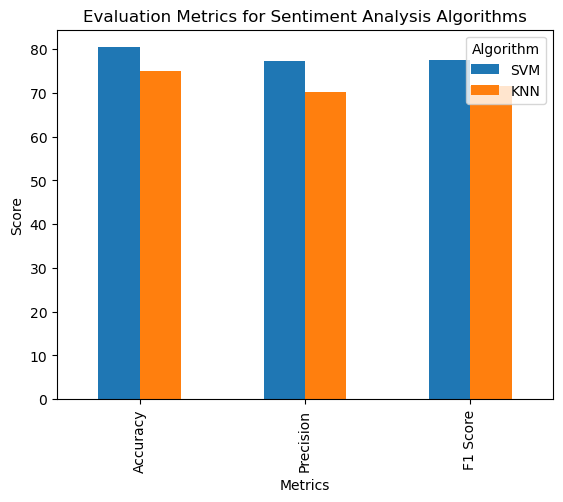

In [50]:
import matplotlib.pyplot as plt

# Evaluation metrics for each algorithm
metrics = {'SVM': {'Accuracy': 80.45, 'Precision': 77.35, 'F1 Score': 77.52},
           'KNN': {'Accuracy': 74.97, 'Precision': 70.21, 'F1 Score': 71.63}}

metrics_df = pd.DataFrame(metrics)

metrics_df.plot(kind='bar')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Sentiment Analysis Algorithms')
plt.legend(title='Algorithm')
plt.show()


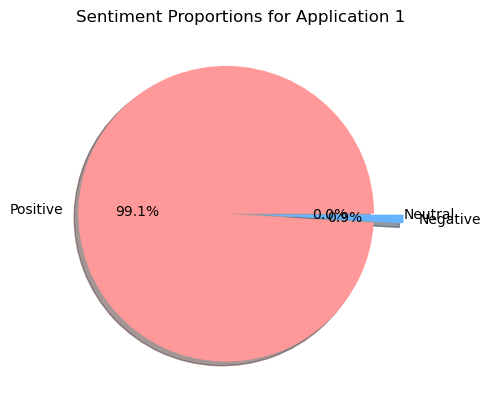

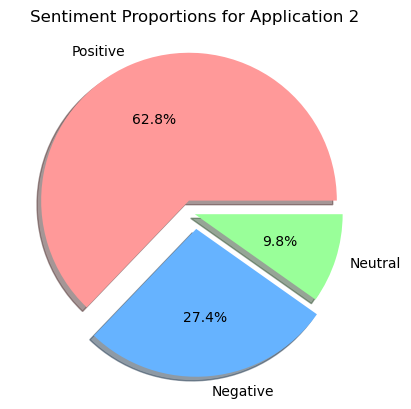

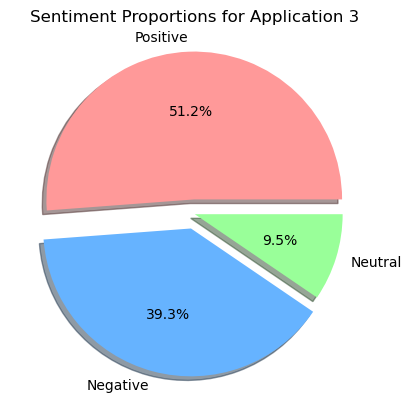

In [110]:
# Calculate sentiment proportions for each Android application
sentiment_proportions = {'Application 1': {'Positive': 106, 'Negative': 1, 'Neutral': 0},
                         'Application 2': {'Positive': 186, 'Negative': 81, 'Neutral': 29},
                         'Application 3': {'Positive': 86, 'Negative': 66, 'Neutral': 16}}

# Plot pie charts for each Android application
for app, proportions in sentiment_proportions.items():
    labels = proportions.keys()
    sizes = proportions.values()
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, colors=['#FF9999', '#66B3FF', '#99FF99'], shadow=True)
    plt.title(f'Sentiment Proportions for {app}')
    plt.show()


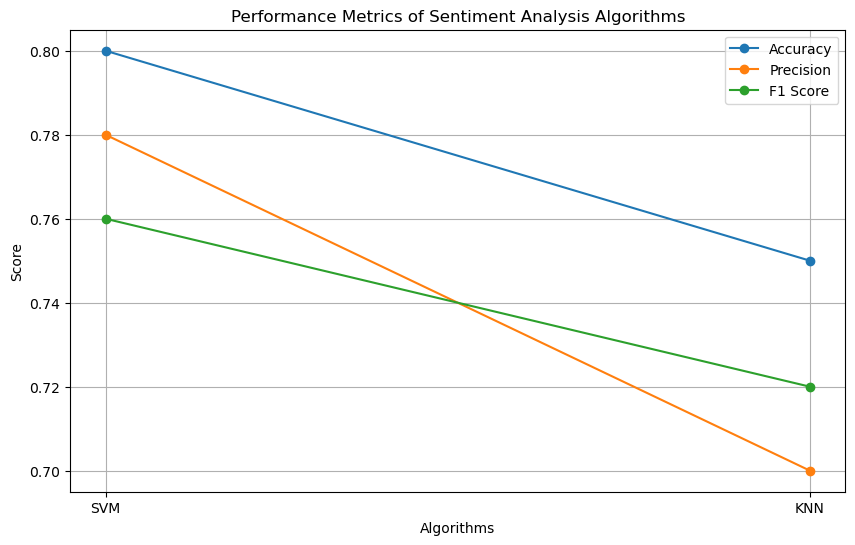

In [102]:
import matplotlib.pyplot as plt

algorithms = ['SVM', 'KNN']
accuracy = [0.80, 0.75]
precision = [0.78, 0.70]
f1_score = [0.76, 0.72]

# Plotting the performance metrics
plt.figure(figsize=(10, 6))

plt.plot(algorithms, accuracy, marker='o', label='Accuracy')
plt.plot(algorithms, precision, marker='o', label='Precision')
plt.plot(algorithms, f1_score, marker='o', label='F1 Score')

plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics of Sentiment Analysis Algorithms')
plt.legend()
plt.grid(True)
plt.show()


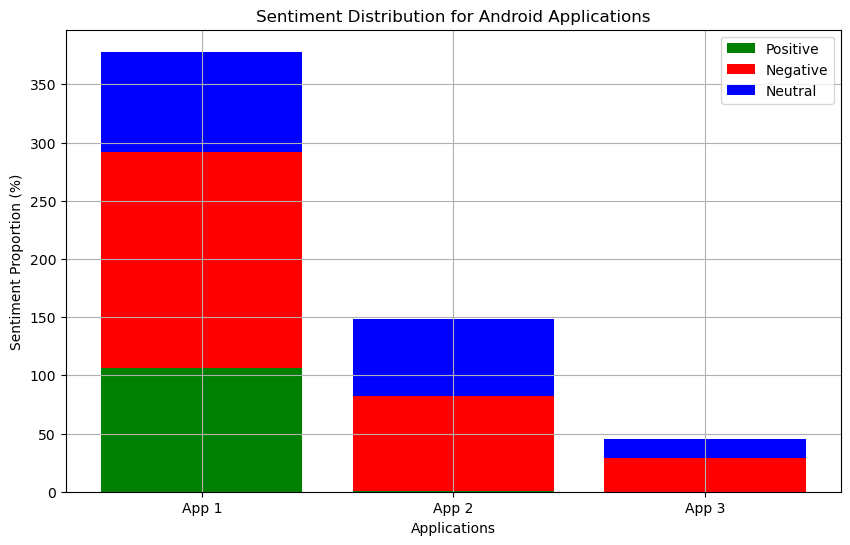

In [108]:
import matplotlib.pyplot as plt

# Sample sentiment proportions for each application
applications = ['App 1', 'App 2', 'App 3']
positive = [106, 1, 0]
negative = [186, 81, 29]
neutral = [86, 66, 16]

# Plotting the sentiment distribution
plt.figure(figsize=(10, 6))

plt.bar(applications, positive, color='g', label='Positive')
plt.bar(applications, negative, bottom=positive, color='r', label='Negative')
plt.bar(applications, neutral, bottom=[i+j for i,j in zip(positive, negative)], color='b', label='Neutral')

plt.xlabel('Applications')
plt.ylabel('Sentiment Proportion (%)')
plt.title('Sentiment Distribution for Android Applications')
plt.legend()
plt.grid(True)
plt.show()
